In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/train.csv')
test_data = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/test.csv')
test_dataY = pd.read_csv('/content/drive/My Drive/MY ML JOURNEY/WEEK 1 practice /house-prices-advanced-regression-techniques/sample_submission.csv')


In [ ]:
tr = train_data.copy()
te = test_data.copy()


In [ ]:
all_object_data = tr.select_dtypes(include=['object'])
all_object_data['SalePrice'] = tr.SalePrice

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
(((all_object_data.isnull().sum())*100)/len(all_object_data)).sort_values(ascending = False,kind = 'mergesort').head(16),
(((te.isnull().sum())*100)/len(te)).sort_values(ascending = False,kind = 'mergesort').head(16)


PoolQC          99.794380
MiscFeature     96.504455
Alley           92.666210
Fence           80.123372
FireplaceQu     50.034270
LotFrontage     15.558602
GarageCond       5.346127
GarageQual       5.346127
GarageFinish     5.346127
GarageYrBlt      5.346127
GarageType       5.209047
BsmtCond         3.084304
BsmtExposure     3.015764
BsmtQual         3.015764
BsmtFinType2     2.878684
BsmtFinType1     2.878684
dtype: float64

In [ ]:
tr.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
te.drop(['PoolQC','MiscFeature','Alley','Fence'],axis=1,inplace=True)
tr.head(5),te.head(5)

(   Id  MSSubClass MSZoning  ...  SaleType  SaleCondition SalePrice
 0   1          60       RL  ...        WD         Normal    208500
 1   2          20       RL  ...        WD         Normal    181500
 2   3          60       RL  ...        WD         Normal    223500
 3   4          70       RL  ...        WD        Abnorml    140000
 4   5          60       RL  ...        WD         Normal    250000
 
 [5 rows x 77 columns],
      Id  MSSubClass MSZoning  ...  YrSold  SaleType SaleCondition
 0  1461          20       RH  ...    2010        WD        Normal
 1  1462          20       RL  ...    2010        WD        Normal
 2  1463          60       RL  ...    2010        WD        Normal
 3  1464          60       RL  ...    2010        WD        Normal
 4  1465         120       RL  ...    2010        WD        Normal
 
 [5 rows x 76 columns])

In [ ]:
all_object_data = tr.select_dtypes(include=['object'])
all_object_data['SalePrice'] = tr.SalePrice

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
(((all_object_data.isnull().sum())*100)/len(all_object_data)).sort_values(ascending = False,kind = 'mergesort').head(16)

FireplaceQu      47.260274
GarageCond        5.547945
GarageQual        5.547945
GarageFinish      5.547945
GarageType        5.547945
BsmtFinType2      2.602740
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtCond          2.534247
BsmtQual          2.534247
MasVnrType        0.547945
Electrical        0.068493
SalePrice         0.000000
SaleCondition     0.000000
SaleType          0.000000
PavedDrive        0.000000
dtype: float64

In [ ]:
tr['FireplaceQu'].value_counts()

Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [ ]:
dataset = [tr,te]
for i in dataset:
  for j in i:
    if i[j].dtype == object and ((i[j].isnull().sum())*100)/len(i[j])<10:
      i[j] = i[j].fillna(i[j].mode()[0])

In [ ]:
all_object_data = tr.select_dtypes(include=['object'])
all_object_data['SalePrice'] = tr.SalePrice

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
(((all_object_data.isnull().sum())*100)/len(all_object_data)).sort_values(ascending = False,kind = 'mergesort').head(16)

FireplaceQu      47.260274
SalePrice         0.000000
SaleCondition     0.000000
SaleType          0.000000
PavedDrive        0.000000
GarageCond        0.000000
GarageQual        0.000000
GarageFinish      0.000000
GarageType        0.000000
Functional        0.000000
KitchenQual       0.000000
Electrical        0.000000
CentralAir        0.000000
HeatingQC         0.000000
Heating           0.000000
BsmtFinType2      0.000000
dtype: float64

In [ ]:
all_int_data = tr.select_dtypes(exclude=['object'])

In [ ]:
(((all_int_data.isnull().sum())*100)/len(all_int_data)).sort_values(ascending = False,kind = 'mergesort').head(16)

LotFrontage      17.739726
GarageYrBlt       5.547945
MasVnrArea        0.547945
SalePrice         0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
GarageArea        0.000000
GarageCars        0.000000
Fireplaces        0.000000
dtype: float64

In [ ]:
tr['LotFrontage'] = tr['LotFrontage'].fillna(tr['LotFrontage'].mean())
tr['GarageYrBlt'] = tr['GarageYrBlt'].fillna(tr['GarageYrBlt'].mode()[0])
tr['MasVnrArea'] = tr['MasVnrArea'].fillna(tr['MasVnrArea'].mean())

In [ ]:
all_int_data = tr.select_dtypes(exclude=['object'])

In [ ]:
(((all_int_data.isnull().sum())*100)/len(all_int_data)).sort_values(ascending = False,kind = 'mergesort').head(16)

SalePrice        0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
PoolArea         0.0
ScreenPorch      0.0
3SsnPorch        0.0
EnclosedPorch    0.0
OpenPorchSF      0.0
WoodDeckSF       0.0
GarageArea       0.0
GarageCars       0.0
GarageYrBlt      0.0
Fireplaces       0.0
TotRmsAbvGrd     0.0
KitchenAbvGr     0.0
dtype: float64

In [ ]:
(((te.isnull().sum())*100)/len(te)).sort_values(ascending = False,kind = 'mergesort').head(16)

FireplaceQu      50.034270
LotFrontage      15.558602
GarageYrBlt       5.346127
MasVnrArea        1.028101
BsmtHalfBath      0.137080
BsmtFullBath      0.137080
GarageArea        0.068540
GarageCars        0.068540
TotalBsmtSF       0.068540
BsmtUnfSF         0.068540
BsmtFinSF2        0.068540
BsmtFinSF1        0.068540
SaleCondition     0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
dtype: float64

In [ ]:
te['LotFrontage'] = te['LotFrontage'].fillna(te['LotFrontage'].mean())
te['GarageYrBlt'] = te['GarageYrBlt'].fillna(te['GarageYrBlt'].mode()[0])
te['MasVnrArea'] = te['MasVnrArea'].fillna(te['MasVnrArea'].mean())
te['BsmtHalfBath'] = te['BsmtHalfBath'].fillna(te['BsmtHalfBath'].mode()[0])
te['BsmtFullBath'] = te['BsmtFullBath'].fillna(te['BsmtFullBath'].mode()[0])
te['GarageArea'] = te['GarageArea'].fillna(te['GarageArea'].mean())
te['GarageCars'] = te['GarageCars'].fillna(te['GarageCars'].mean())
te['TotalBsmtSF'] = te['TotalBsmtSF'].fillna(te['TotalBsmtSF'].mean())
te['BsmtUnfSF'] = te['BsmtUnfSF'].fillna(te['BsmtUnfSF'].mean())
te['BsmtFinSF2'] = te['BsmtFinSF2'].fillna(te['BsmtFinSF2'].mean())
te['BsmtFinSF1'] = te['BsmtFinSF1'].fillna(te['BsmtFinSF1'].mean())


In [ ]:
all_int_data['FireplaceQu'] = tr['FireplaceQu']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
(((all_int_data.isnull().sum())*100)/len(all_int_data)).sort_values(ascending = False,kind = 'mergesort').head(16)

FireplaceQu      47.260274
SalePrice         0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
3SsnPorch         0.000000
EnclosedPorch     0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
GarageArea        0.000000
GarageCars        0.000000
GarageYrBlt       0.000000
Fireplaces        0.000000
TotRmsAbvGrd      0.000000
dtype: float64

In [ ]:
all_int_dataTe = te.select_dtypes(exclude=['object'])
all_int_dataTe['FireplaceQu'] = te['FireplaceQu']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
(((all_int_dataTe.isnull().sum())*100)/len(all_int_dataTe)).sort_values(ascending = False,kind = 'mergesort').head(16)

FireplaceQu      50.03427
YrSold            0.00000
MoSold            0.00000
MiscVal           0.00000
PoolArea          0.00000
ScreenPorch       0.00000
3SsnPorch         0.00000
EnclosedPorch     0.00000
OpenPorchSF       0.00000
WoodDeckSF        0.00000
GarageArea        0.00000
GarageCars        0.00000
GarageYrBlt       0.00000
Fireplaces        0.00000
TotRmsAbvGrd      0.00000
KitchenAbvGr      0.00000
dtype: float64

In [ ]:
tr['FireplaceQu'].unique(),te['FireplaceQu'].unique()

(array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object),
 array([nan, 'TA', 'Gd', 'Po', 'Fa', 'Ex'], dtype=object))

In [ ]:
def classify_missing(all_int_dataTe):
  fire_train = pd.DataFrame()
  fire_test = pd.DataFrame()
  null_row_list = list(all_int_dataTe[all_int_dataTe['FireplaceQu'].isnull()].index.tolist())
  col = list(all_int_dataTe.columns)
  k = -1
  for j in null_row_list:
    try:
      k+=1 
      null_row_value = all_int_dataTe.iloc[j]
      null_row_value = list(null_row_value.values)
      for i in range(len(null_row_value)):
        fire_test.loc[k,col[i]] = null_row_value[i]
    except:
      continue
  fire_train = all_int_dataTe.dropna()
  fire_test = fire_test.drop(['FireplaceQu'],axis = 1)

  f_train = fire_train.drop(['FireplaceQu'],axis = 1)
  y_train = fire_train['FireplaceQu']

  from sklearn import preprocessing
  le = preprocessing.LabelEncoder()
  le.fit(y_train)
  y_train = le.transform(y_train)

  from sklearn.model_selection import train_test_split
  X_train, X_test, y_train, y_test = train_test_split(f_train, y_train, test_size=0.1, random_state=1)

  from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
  mod = RandomForestClassifier()
  mod.fit(X_train,y_train)
  Y_prediction = mod.predict(fire_test)
  mod.score(X_test, y_test)
  acc_random_forest = round(mod.score(X_test, y_test) * 100, 2)
  res = le.inverse_transform(Y_prediction)

  for i in range(len(null_row_list)):
    try:
      all_int_dataTe.loc[null_row_list[i],'FireplaceQu'] = res[i]
    except:
      print('error')
  return all_int_dataTe['FireplaceQu']
tr['FireplaceQu'] = classify_missing(all_int_data)
te['FireplaceQu'] = classify_missing(all_int_dataTe)

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [ ]:
#tr['FireplaceQu'] = all_int_data['FireplaceQu']
#te['FireplaceQu'] = all_int_dataTe['FireplaceQu']

In [ ]:
(((te.isnull().sum())*100)/len(te)).sort_values(ascending = False,kind = 'mergesort').head(5)

SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
MiscVal          0.0
dtype: float64

In [ ]:
(((tr.isnull().sum())*100)/len(tr)).sort_values(ascending = False,kind = 'mergesort').head(5)

SalePrice        0.0
SaleCondition    0.0
SaleType         0.0
YrSold           0.0
MoSold           0.0
dtype: float64

In [ ]:
train_data = tr.copy()
test_data = te.copy()

In [ ]:
train_data.loc[train_data['Exterior1st'] == train_data['Exterior2nd'],'Exterior'] = 1
train_data.loc[train_data['Exterior1st'] != train_data['Exterior2nd'],'Exterior'] = 2
train_data.loc[train_data['Condition1'] == train_data['Condition2'],'Condition'] = 1
train_data.loc[train_data['Condition1'] != train_data['Condition2'],'Condition'] = 2
#train_data = train_data.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

test_data.loc[test_data['Exterior1st'] == test_data['Exterior2nd'],'Exterior'] = 1
test_data.loc[test_data['Exterior1st'] != test_data['Exterior2nd'],'Exterior'] = 2
test_data.loc[test_data['Condition1'] == test_data['Condition2'],'Condition'] = 1
test_data.loc[test_data['Condition1'] != test_data['Condition2'],'Condition'] = 2
#test_data = test_data.drop(['Exterior1st','Exterior2nd','Condition1','Condition2'],axis = 1)

In [ ]:
all_mean = ['Condition1','Exterior2nd','Condition2','Exterior1st','ExterCond','BsmtCond','GarageCond','Utilities','HouseStyle','Electrical','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','ExterQual','BsmtQual','KitchenQual','FireplaceQu','GarageQual']
len(all_mean)

19

In [ ]:
import operator
def cleaning_mean_encoding(data,data1,all_mean):
  for i in data:
    if data[i].dtype == object and i in all_mean:
    #if i != 'SalePrice' and i!= 'Exterior' and i!= 'Condition' and data[i].dtype == object and ((d_type == 'nominal' and (i in nominal_column) and data[i].dtype == object) or (d_type == 'ordinal' and i in ordinal_column and data[i].dtype == object)):
      Mean_encoded_subject = data.groupby([i])['SalePrice'].mean().to_dict() 
      sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
      #print('Dictionary in ascending order by value : ',sorted_d)
      li = list(sorted_d)
      new_dict = {}
      for j in li:
        new_dict[j] = li.index(j)+1
      #print(new_dict)
      data[i] =  data[i].map(new_dict) 
      #if i not in null_test:
      data1[i] =  data1[i].map(new_dict) 
  return data,data1
train_data,test_data = cleaning_mean_encoding(train_data,test_data,all_mean)

In [ ]:
rest_obj_data = ['CentralAir','MSZoning','Street','LotShape','LandContour','LotConfig','LandSlope','BldgType','RoofStyle','RoofMatl','MasVnrType','Foundation','Heating','Functional','GarageType','GarageFinish','PavedDrive','SaleType','SaleCondition']
train_data,test_data = cleaning_mean_encoding(train_data,test_data,rest_obj_data)

In [ ]:
train_data.head(4),test_data.head(4)

(   Id  MSSubClass  MSZoning  ...  SalePrice  Exterior  Condition
 0   1          60         4  ...     208500       1.0        1.0
 1   2          20         4  ...     181500       1.0        2.0
 2   3          60         4  ...     223500       1.0        1.0
 3   4          70         4  ...     140000       2.0        1.0
 
 [4 rows x 79 columns],
      Id  MSSubClass  MSZoning  ...  SaleCondition  Exterior  Condition
 0  1461          20         3  ...              5       1.0        2.0
 1  1462          20         4  ...              5       1.0        1.0
 2  1463          60         4  ...              5       1.0        1.0
 3  1464          60         4  ...              5       1.0        1.0
 
 [4 rows x 78 columns])

In [ ]:
import operator
def count_encoding(data,i):
  if data[i].dtype == object:
    Mean_encoded_subject = data[i].value_counts().to_dict() 
    sorted_d = dict(sorted(Mean_encoded_subject.items(), key=operator.itemgetter(1)))
    li = list(sorted_d)
    new_dict = {}
    for j in li:
      new_dict[j] = li.index(j)+1
    data[i] =  data[i].map(new_dict) 
  return data[i]
dataset = [train_data,test_data]
for i in dataset:
  for j in i:
    if i[j].dtype == object:
      i[j] = count_encoding(i,j)

In [ ]:
train_data.select_dtypes(include=['object']).head(3),test_data.select_dtypes(include=['object']).head(3)

(Empty DataFrame
 Columns: []
 Index: [0, 1, 2], Empty DataFrame
 Columns: []
 Index: [0, 1, 2])

In [ ]:
train_data['OverallQual'] = (train_data['OverallQual']+train_data['OverallCond']**.1)
test_data['OverallQual'] = (test_data['OverallQual']+test_data['OverallCond']**.1)
train_data = train_data.drop(['OverallCond'],axis=1)
test_data = test_data.drop(['OverallCond'],axis=1)

In [ ]:
(train_data['OverallQual']).corr(train_data['SalePrice'])

0.7907001554852598

In [ ]:
all_qual = [
 'HeatingQC',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual']
c = .1
a = train_data['OverallQual']
for i in all_qual:
  a = a * (train_data[i]**c)
  c = c + .1
train_data['OverallQual'] = a
train_data = train_data.drop(['HeatingQC',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual'],axis = 1)

In [ ]:
c = .1
a = test_data['OverallQual']
for i in all_qual:
  a = a * (test_data[i]**c)
  c = c + .1
test_data['OverallQual'] = a
test_data = test_data.drop(['HeatingQC',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual'],axis = 1)

In [ ]:
(train_data['OverallQual']).corr(train_data['SalePrice'])#train_data['OverallQual']

0.8218621861672764

In [ ]:
train_data.head(3),train_data.shape

(   Id  MSSubClass  MSZoning  ...  SalePrice  Exterior  Condition
 0   1          60         4  ...     208500       1.0        1.0
 1   2          20         4  ...     181500       1.0        2.0
 2   3          60         4  ...     223500       1.0        1.0
 
 [3 rows x 72 columns], (1460, 72))

In [ ]:
train_data.head(5)

Id  MSSubClass  MSZoning  ...  SalePrice  Exterior  Condition
0   1          60         4  ...     208500       1.0        1.0
1   2          20         4  ...     181500       1.0        2.0
2   3          60         4  ...     223500       1.0        1.0
3   4          70         4  ...     140000       2.0        1.0
4   5          60         4  ...     250000       1.0        1.0

[5 rows x 72 columns]

In [ ]:
all_mean

['Condition1',
 'Exterior2nd',
 'Condition2',
 'Exterior1st',
 'ExterCond',
 'BsmtCond',
 'GarageCond',
 'Utilities',
 'HouseStyle',
 'Electrical',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'ExterQual',
 'BsmtQual',
 'KitchenQual',
 'FireplaceQu',
 'GarageQual']

In [ ]:
all_cond = ['Condition1',
 'Exterior2nd',
 'Condition2',
 'Exterior1st',
 'ExterCond',
 'BsmtCond',
 'GarageCond',
 'Exterior']
c = .9
a = train_data['Condition']
for i in all_cond:
  a = a + (train_data[i]*c)
  #c = c + .1

c = .9
a1 = test_data['Condition']
for i in all_cond:
  a1 = a1 * (test_data[i]*c)
  #c = c + .1
#'''
train_data['OverallCond'] = a
test_data['OverallCond'] = a1
train_data = train_data.drop(['Condition1',
 'Exterior2nd',
 'Condition2',
 'Exterior1st',
 'ExterCond',
 'BsmtCond',
 'GarageCond',
 'Exterior'],axis = 1)
test_data = test_data.drop(['Condition1',
 'Exterior2nd',
 'Condition2',
 'Exterior1st',
 'ExterCond',
 'BsmtCond',
 'GarageCond',
 'Exterior'],axis = 1)
#'''

In [ ]:
train_data['OverallCond'].corr(train_data['SalePrice'])

0.40452384994923046

In [ ]:
#YearBuilt
train_data.loc[(train_data['YearBuilt'] >= 1870) & (train_data['YearBuilt'] <= 1954), 'YearBuilt'] = 1
train_data.loc[(train_data['YearBuilt'] > 1954) & (train_data['YearBuilt'] <= 1973), 'YearBuilt'] = 2
train_data.loc[(train_data['YearBuilt'] > 1973) & (train_data['YearBuilt'] <= 2000), 'YearBuilt'] = 3
train_data.loc[(train_data['YearBuilt'] > 2000) & (train_data['YearBuilt'] <= 2010), 'YearBuilt'] = 4

test_data.loc[(test_data['YearBuilt'] >= 1870) & (test_data['YearBuilt'] <= 1954), 'YearBuilt'] = 1
test_data.loc[(test_data['YearBuilt'] > 1954) & (test_data['YearBuilt'] <= 1973), 'YearBuilt'] = 2
test_data.loc[(test_data['YearBuilt'] > 1973) & (test_data['YearBuilt'] <= 2000), 'YearBuilt'] = 3
test_data.loc[(test_data['YearBuilt'] > 2000) & (test_data['YearBuilt'] <= 2010), 'YearBuilt'] = 4

#YearRemodAdd
train_data.loc[(train_data['YearRemodAdd'] >= 1950) & (train_data['YearRemodAdd'] <= 1967), 'YearRemodAdd'] = 1
train_data.loc[(train_data['YearRemodAdd'] > 1967) & (train_data['YearRemodAdd'] <= 1994), 'YearRemodAdd'] = 2
train_data.loc[(train_data['YearRemodAdd'] > 1994) & (train_data['YearRemodAdd'] <= 2004), 'YearRemodAdd'] = 3
train_data.loc[(train_data['YearRemodAdd'] > 2004) & (train_data['YearRemodAdd'] <= 2010), 'YearRemodAdd'] = 4

test_data.loc[(test_data['YearRemodAdd'] >= 1950) & (test_data['YearRemodAdd'] <= 1967), 'YearRemodAdd'] = 1
test_data.loc[(test_data['YearRemodAdd'] > 1967) & (test_data['YearRemodAdd'] <= 1994), 'YearRemodAdd'] = 2
test_data.loc[(test_data['YearRemodAdd'] > 1994) & (test_data['YearRemodAdd'] <= 2004), 'YearRemodAdd'] = 3
test_data.loc[(test_data['YearRemodAdd'] > 2004) & (test_data['YearRemodAdd'] <= 2010), 'YearRemodAdd'] = 4

#YrSold
train_data.loc[(train_data['YrSold'] >= 2006) & (train_data['YrSold'] <= 2007), 'YrSold'] = 1
train_data.loc[(train_data['YrSold'] > 2007) & (train_data['YrSold'] <= 2008), 'YrSold'] = 2
train_data.loc[(train_data['YrSold'] > 2008) & (train_data['YrSold'] <= 2009), 'YrSold'] = 3
train_data.loc[(train_data['YrSold'] > 2009) & (train_data['YrSold'] <= 2010), 'YrSold'] = 4

test_data.loc[(test_data['YrSold'] >= 2006) & (test_data['YrSold'] <= 2007), 'YrSold'] = 1
test_data.loc[(test_data['YrSold'] > 2007) & (test_data['YrSold'] <= 2008), 'YrSold'] = 2
test_data.loc[(test_data['YrSold'] > 2008) & (test_data['YrSold'] <= 2009), 'YrSold'] = 3
test_data.loc[(test_data['YrSold'] > 2009) & (test_data['YrSold'] <= 2010), 'YrSold'] = 4

#GarageYrBlt
train_data.loc[(train_data['GarageYrBlt'] >= 1900) & (train_data['GarageYrBlt'] <= 1962), 'GarageYrBlt'] = 1
train_data.loc[(train_data['GarageYrBlt'] > 1962) & (train_data['GarageYrBlt'] <= 1984), 'GarageYrBlt'] = 2
train_data.loc[(train_data['GarageYrBlt'] > 1984) & (train_data['GarageYrBlt'] <= 2003), 'GarageYrBlt'] = 3
train_data.loc[(train_data['GarageYrBlt'] > 2003) & (train_data['GarageYrBlt'] <= 2010), 'GarageYrBlt'] = 4

test_data.loc[(test_data['GarageYrBlt'] >= 1895) & (test_data['GarageYrBlt'] <= 1960), 'GarageYrBlt'] = 1
test_data.loc[(test_data['GarageYrBlt'] > 1960) & (test_data['GarageYrBlt'] <= 1982), 'GarageYrBlt'] = 2
test_data.loc[(test_data['GarageYrBlt'] > 1982) & (test_data['GarageYrBlt'] <= 2004), 'GarageYrBlt'] = 3
test_data.loc[(test_data['GarageYrBlt'] > 2004) & (test_data['GarageYrBlt'] <= 2207), 'GarageYrBlt'] = 4


In [ ]:
year_all = ['YearRemodAdd','YrSold','MoSold','GarageYrBlt']
c = .1
a = train_data['YearBuilt']
for i in year_all:
  a = a * (train_data[i]**c)
  #c = c + .1
train_data['YearBuilt'] =a

c = .1
a = test_data['YearBuilt']
for i in year_all:
  a = a * (test_data[i]**c)
  #c = c + .1
test_data['YearBuilt'] =a
train_data = train_data.drop(year_all,axis = 1)
test_data = test_data.drop(year_all,axis = 1)

In [ ]:
tot_sqrf = ['WoodDeckSF','LotArea','MasVnrArea','TotalBsmtSF','BsmtFinSF1','BsmtUnfSF','BsmtFinSF2','1stFlrSF','2ndFlrSF','LowQualFinSF','GrLivArea','GarageArea','PoolArea','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch']
c = .5
a = train_data['LotFrontage']
for i in tot_sqrf:
  a = a + (train_data[i]**c)
  #c = c + .1
train_data['LotFrontage'] =a

c = .5
a = test_data['LotFrontage']
for i in tot_sqrf:
  a = a * (test_data[i]**c)
  #c = c + .1
test_data['LotFrontage'] =a
train_data = train_data.drop(tot_sqrf,axis = 1)
test_data = test_data.drop(tot_sqrf,axis = 1)

In [ ]:
a = (train_data['BsmtExposure']*train_data['BsmtFinType1']**.9*train_data['BsmtFinType2']**.9)
train_data['BsmtExposure'] =a
a = (test_data['BsmtExposure']*test_data['BsmtFinType1']**.9*test_data['BsmtFinType2']**.9)
test_data['BsmtExposure'] =a

train_data = train_data.drop(['BsmtFinType1','BsmtFinType2'],axis = 1)
test_data = test_data.drop(['BsmtFinType1','BsmtFinType2'],axis = 1)

In [ ]:
bath = ['BsmtHalfBath',	'FullBath',	'HalfBath']
c = 1.5
a = train_data['BsmtFullBath']
for i in bath:
  a = a + (train_data[i]**c)
  #c = c + .1
train_data['BsmtFullBath'] =a

c = 1.5
a = test_data['BsmtFullBath']
for i in bath:
  a = a * (test_data[i]**c)
  #c = c + .1
test_data['BsmtFullBath'] =a
train_data = train_data.drop(bath,axis = 1)
test_data = test_data.drop(bath,axis = 1)

In [ ]:
above_grd = [	'KitchenAbvGr',	'TotRmsAbvGrd'	]
c = 1.9
a = train_data['BedroomAbvGr']
for i in above_grd:
  a = a + (train_data[i]**c)
  c = c + .5
train_data['BedroomAbvGr'] =a

c = 1.5
a = test_data['BedroomAbvGr']
for i in above_grd:
  a = a * (test_data[i]**c)
  #c = c + .1
test_data['BedroomAbvGr'] =a
train_data = train_data.drop(above_grd,axis = 1)
test_data = test_data.drop(above_grd,axis = 1)

In [ ]:
train_data.head(5)

Id  MSSubClass  MSZoning  ...  SalePrice  Condition  OverallCond
0   1          60         4  ...     208500        1.0         44.2
1   2          20         4  ...     181500        2.0         30.8
2   3          60         4  ...     223500        1.0         44.2
3   4          70         4  ...     140000        1.0         37.0
4   5          60         4  ...     250000        1.0         44.2

[5 rows x 37 columns]

In [ ]:
train_data['BedroomAbvGr'].corr(train_data['SalePrice'])
#a.corr(train_data['SalePrice'])

0.5154124401072232

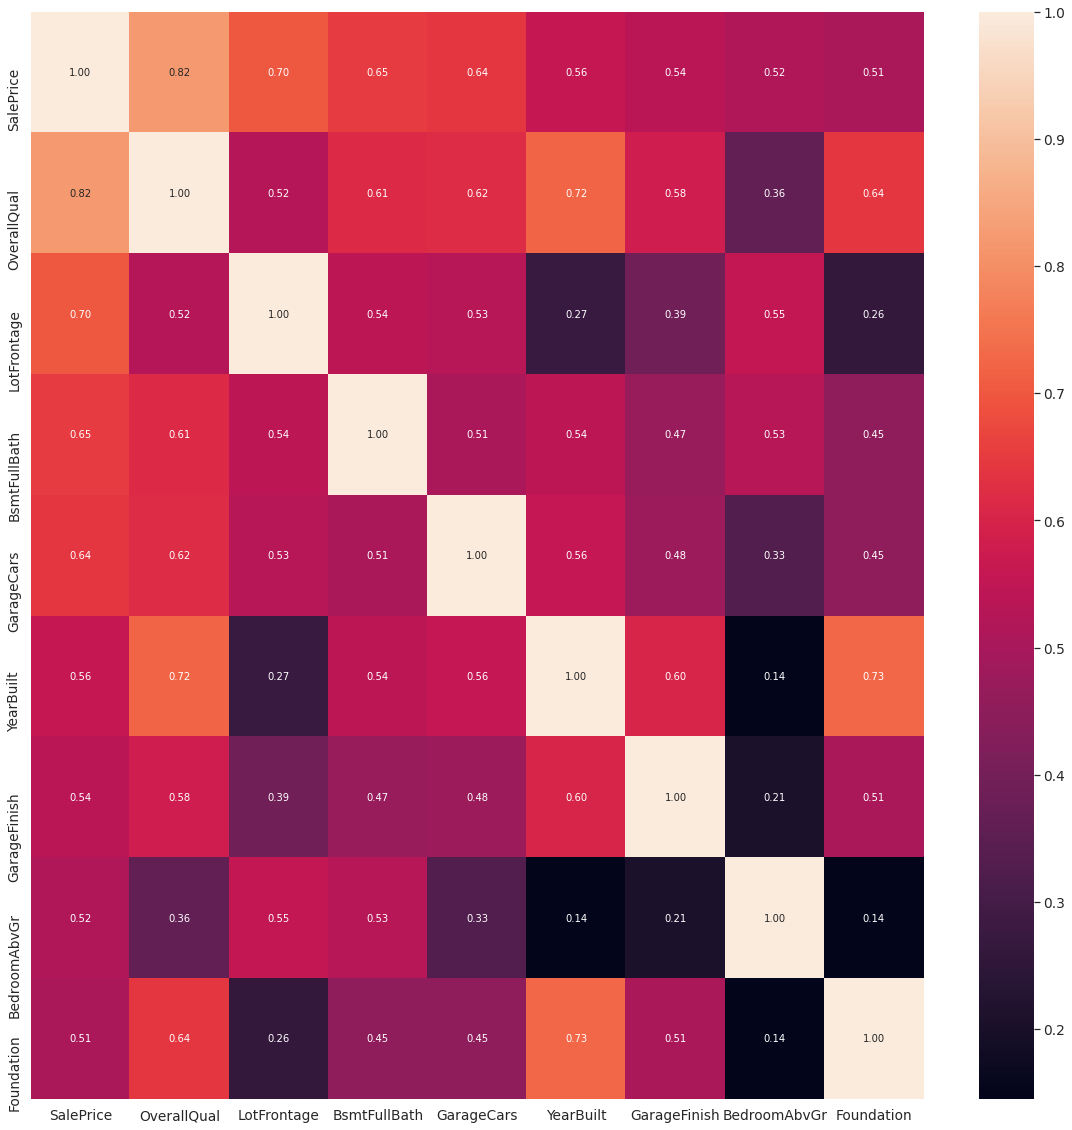

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
corrmat = train_data.corr()
k =9
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_data[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
tr_n = train_data.copy()
te_n = test_data.copy()

In [ ]:
for i in tr_n:
  tr_n[i] = np.log(tr_n[i]+1)
for i in te_n:
  te_n[i] = np.log(te_n[i]+1)

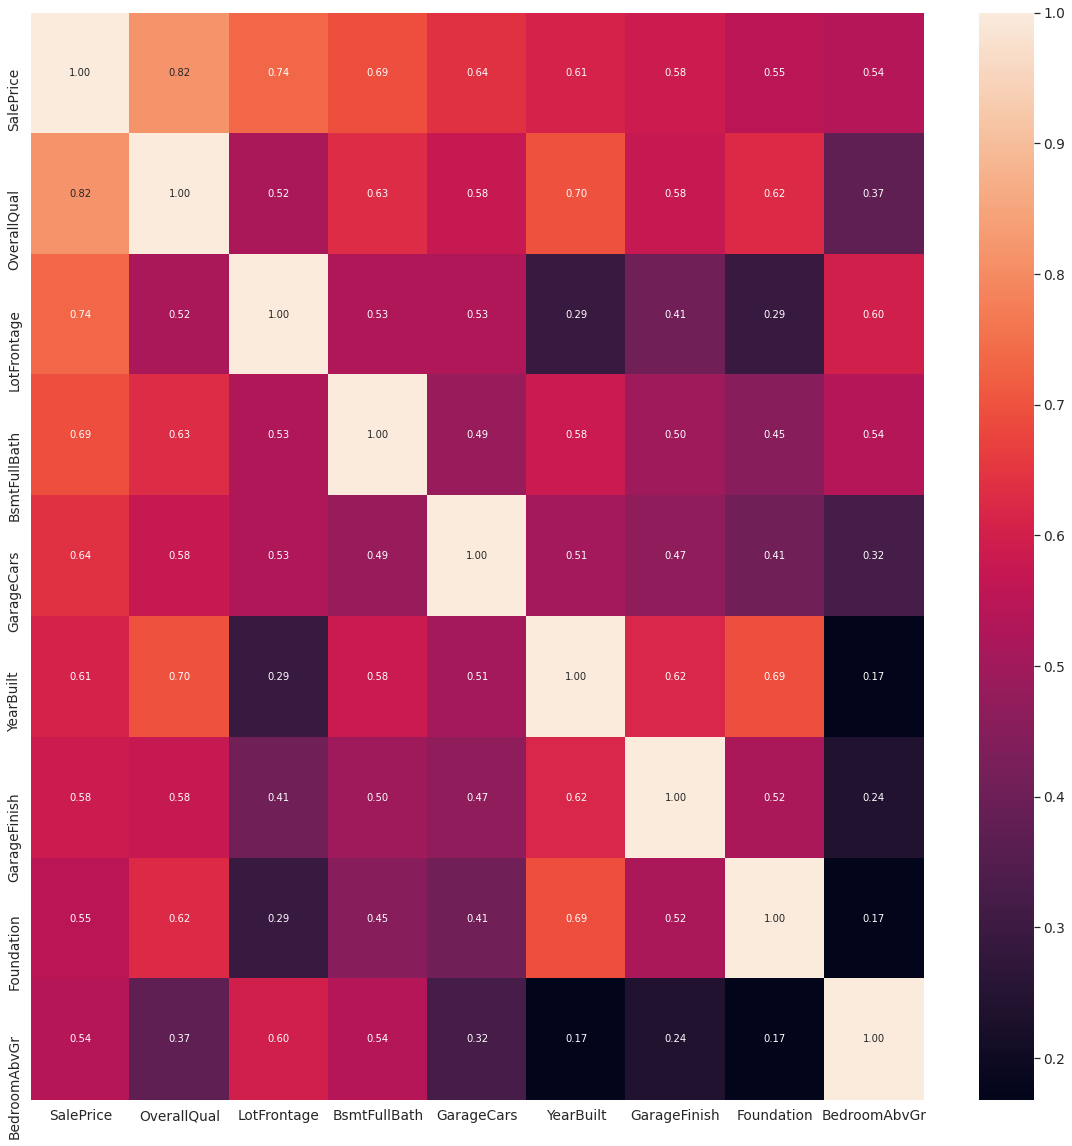

In [ ]:
f,ax = plt.subplots(figsize=(20, 20))
corrmat = tr_n.corr()
k =9
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(tr_n[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=False, fmt='.2f', annot_kws={'size': 10}, yticklabels=
                 cols.values, xticklabels=cols.values)
plt.show()

In [ ]:
tr_n = tr_n.filter(cols,axis=1)
te_n = te_n.filter(cols,axis=1)

In [ ]:
tr_n = tr_n.drop(['OverallQual'],axis = 1)
te_n = te_n.drop(['OverallQual'],axis = 1)

In [ ]:
tr_n.shape,te_n.shape

((1460, 8), (1459, 7))

In [ ]:
y = tr_n['SalePrice']
train = tr_n.drop(['SalePrice'],axis = 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size=0.1, random_state=1)

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
reg = linear_model.LinearRegression()
reg.fit(X_train,y_train)
lin_pred = reg.predict(X_test)
# The coefficients
print('Coefficients: \n', reg.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, lin_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, lin_pred))


Coefficients: 
 [0.78785397 0.17801243 0.20248486 0.1466743  0.10579335 0.1500338
 0.07232786]
Mean squared error: 0.04
Coefficient of determination: 0.80


In [ ]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=.9)
ridge.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)
# The coefficients
print('Coefficients: \n', ridge.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, ridge_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, ridge_pred))

Coefficients: 
 [0.76158264 0.17929644 0.20630847 0.14528642 0.10867289 0.1504435
 0.07612802]
Mean squared error: 0.04
Coefficient of determination: 0.80


In [ ]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
# The coefficients
print('Coefficients: \n', lasso.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, lasso_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, lasso_pred))

Coefficients: 
 [0.         0.         0.         0.01355845 0.         0.
 0.05792688]
Mean squared error: 0.17
Coefficient of determination: 0.10


In [ ]:
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.datasets import make_regression
pregr = PassiveAggressiveRegressor(max_iter=10000, random_state=0,tol=1e-3)
pregr.fit(X_train, y_train)
pregr_pred = pregr.predict(X_test)
# The coefficients
print('Coefficients: \n', pregr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, pregr_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, pregr_pred))

Coefficients: 
 [ 1.60481848  0.07593034  0.05833945  0.1984624   0.00716579  0.15623255
 -0.03296007]
Mean squared error: 0.05
Coefficient of determination: 0.71


In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
n_samples, n_features = 10, 5
sgd = make_pipeline(StandardScaler(),SGDRegressor(max_iter=1000, tol=1e-3))
sgd.fit(X_train, y_train)
sgd_pred = sgd.predict(X_test)
# The coefficients
#print('Coefficients: \n', sgd.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, sgd_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, sgd_pred))

Mean squared error: 0.04
Coefficient of determination: 0.80


In [ ]:
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state=0, n_estimators=1000,loss='square')
ada.fit(X_train, y_train)
ada_pred = ada.predict(X_test)
# The coefficients
#print('Coefficients: \n', ada.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, ada_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'% r2_score(y_test, ada_pred))

Mean squared error: 0.04
Coefficient of determination: 0.79


In [ ]:
from sklearn.inspection import permutation_importance
from sklearn.metrics import mean_squared_error
from sklearn import datasets, ensemble
params = {'n_estimators': 500,
          'max_depth': 4,
          'min_samples_split': 5,
          'learning_rate': 0.01,
          'loss': 'ls'}
reg = ensemble.GradientBoostingRegressor(**params)
reg.fit(X_train, y_train)
mse = mean_squared_error(y_test, reg.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Coefficient of determination: %.2f'% r2_score(y_test, reg.predict(X_test)))

The mean squared error (MSE) on test set: 0.0313
Coefficient of determination: 0.83


In [ ]:
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
from sklearn.ensemble import HistGradientBoostingRegressor
est = HistGradientBoostingRegressor().fit(X_train, y_train)
mse = mean_squared_error(y_test, est.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Coefficient of determination: %.2f'% r2_score(y_test, est.predict(X_test)))

The mean squared error (MSE) on test set: 0.0361
Coefficient of determination: 0.81


In [ ]:
est = HistGradientBoostingRegressor(l2_regularization=0, learning_rate=0.1,
                              loss='least_absolute_deviation', max_bins=255,
                              max_depth=15, max_iter=500, max_leaf_nodes=15,
                              min_samples_leaf=20, n_iter_no_change=None,
                              random_state=None, scoring=None, tol=1e-07,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False)
est.fit(X_train,y_train)
mse = mean_squared_error(y_test, est.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))
print('Coefficient of determination: %.2f'% r2_score(y_test, est.predict(X_test)))

The mean squared error (MSE) on test set: 0.0362
Coefficient of determination: 0.81


In [ ]:
y_pred = est.predict(te_n)
y_pred = np.exp(y_pred)
pred_y = y_pred.reshape(-1)
all_id = np.array(test_dataY['Id'])
y_pred = pd.DataFrame(list(zip(all_id, pred_y)),columns =['Id', 'SalePrice'])
y_pred.to_csv("/content/drive/My Drive/MY ML JOURNEY/ur3.csv", index=False)

In [ ]:
for i in above_grd:
  print(i,' ',train_data[i].corr(train_data['SalePrice']))

In [ ]:
train_data.groupby('YearBuilt').sum().sort_values(by = 'YrSold')

In [ ]:
#train_data['LandContour'].unique(),train_data['LandContour'].unique()
for i in train_data:
  if train_data[i].dtype == object:
    print(i)
    print(train_data[i].unique())
    print(test_data[i].unique())
    print()

In [ ]:
train_data.head(5)

In [ ]:
utilities = {'AllPub': 4, 'NoSewr': 3, 'NoSeWa': 2,'ELO': 1}
housStyle = {'1.5Fin':1.5, '1.5Unf':1.25, '1Story':1, '2.5Fin':2.5, '2.5Unf':2.25, '2Story':2,
       'SFoyer':3, 'SLvl':3.5}
#extraq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
extraq = {'Ex': 5, 'Fa': 3, 'Gd': 2,'TA': 4,'Po': 1}
#bstmq = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1,'NA': 0}
bstmq = {'Ex': 5, 'Fa': 3, 'Gd': 2,'TA': 4,'Po': 1,'NA': 0}
bstmt1 = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4,'Rec': 3,'LwQ': 2,'Unf': 1,'NA': 0}
bstmexp = {'Gd': 4, 'Av': 3, 'Mn': 2,'No': 1,'NA': 0}
heat = {'Ex': 5, 'Fa': 4, 'Gd': 3,'TA': 2,'Po': 1}
elec = {'SBrkr': 5, 'FuseA': 4, 'FuseF': 3,'FuseP': 2,'Mix': 3.5}

In [ ]:
train_data['Utilities'] = train_data['Utilities'].map(utilities)
train_data['HouseStyle'] = train_data['HouseStyle'].map(housStyle)
train_data['ExterQual'] = train_data['ExterQual'].map(extraq)
train_data['ExterCond'] = train_data['ExterCond'].map(extraq)
train_data['HeatingQC'] = train_data['HeatingQC'].map(extraq)
train_data['Electrical'] = train_data['Electrical'].map(elec)
train_data['KitchenQual'] = train_data['KitchenQual'].map(extraq)
train_data['BsmtQual'] = train_data['BsmtQual'].map(bstmq)
train_data['BsmtCond'] = train_data['BsmtCond'].map(bstmq)
train_data['BsmtExposure'] = train_data['BsmtExposure'].map(bstmexp)
train_data['BsmtFinType1'] = train_data['BsmtFinType1'].map(bstmt1)
train_data['BsmtFinType2'] = train_data['BsmtFinType2'].map(bstmt1)
train_data['GarageQual'] = train_data['GarageQual'].map(bstmq)
train_data['GarageCond'] = train_data['GarageCond'].map(bstmq)
train_data['FireplaceQu'] = train_data['FireplaceQu'].map(extraq)

In [ ]:
test_data['Utilities'] = test_data['Utilities'].map(utilities)
test_data['HouseStyle'] = test_data['HouseStyle'].map(housStyle)
test_data['ExterQual'] = test_data['ExterQual'].map(extraq)
test_data['ExterCond'] = test_data['ExterCond'].map(extraq)
test_data['HeatingQC'] = test_data['HeatingQC'].map(extraq)
test_data['Electrical'] = test_data['Electrical'].map(elec)
test_data['KitchenQual'] = test_data['KitchenQual'].map(extraq)
test_data['BsmtQual'] = test_data['BsmtQual'].map(bstmq)
test_data['BsmtCond'] = test_data['BsmtCond'].map(bstmq)
test_data['BsmtExposure'] = test_data['BsmtExposure'].map(bstmexp)
test_data['BsmtFinType1'] = test_data['BsmtFinType1'].map(bstmt1)
test_data['BsmtFinType2'] = test_data['BsmtFinType2'].map(bstmt1)
test_data['GarageQual'] = test_data['GarageQual'].map(bstmq)
test_data['GarageCond'] = test_data['GarageCond'].map(bstmq)
test_data['FireplaceQu'] = test_data['FireplaceQu'].map(extraq)

In [ ]:
train_data.shape,test_data.shape

In [ ]:
#qual_listt = ['HeatingQC','OverallQual','ExterQual','BsmtQual','KitchenQual','FireplaceQu','GarageQual']
qual_listt = ['Utilities','HouseStyle','Electrical','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC','OverallQual','ExterQual','BsmtQual','KitchenQual','FireplaceQu','GarageQual']
cond_listt = ['OverallCond','ExterCond','BsmtCond','GarageCond']
for i in qual_listt:
  sns.scatterplot(x=i,y='SalePrice',hue=i,data=train_data)
  plt.show()



In [ ]:
qual_listt = ['HeatingQC','OverallQual','ExterQual','BsmtQual','KitchenQual','FireplaceQu','GarageQual']
cond_listt = ['OverallCond','ExterCond','BsmtCond','GarageCond']
for i in cond_listt:
  sns.scatterplot(x=i,y='SalePrice',hue=i,data=train_data)
  plt.show()

In [ ]:
sns.scatterplot(x=train_data['OverallCond']+train_data['OverallQual'],y='SalePrice',hue='OverallQual',data=train_data)
plt.show()
sns.scatterplot(x='OverallQual',y='SalePrice',hue='OverallQual',data=train_data)
plt.show()
sns.scatterplot(x='OverallCond',y='SalePrice',hue='OverallCond',data=train_data)
plt.show()

In [ ]:
sns.scatterplot(x=train_data['OverallCond']+train_data['OverallQual'],y='SalePrice',hue='OverallQual',data=train_data)
plt.show()
sns.scatterplot(x='OverallQual',y='SalePrice',hue='OverallQual',data=train_data)
plt.show()
sns.scatterplot(x='OverallCond',y='SalePrice',hue='OverallCond',data=train_data)
plt.show()

In [ ]:
sns.scatterplot(x=train_data['ExterQual']*train_data['ExterCond'],y='SalePrice',hue='ExterQual',data=train_data)
plt.show()
sns.scatterplot(x='ExterQual',y='SalePrice',hue='ExterQual',data=train_data)
plt.show()
sns.scatterplot(x='ExterCond',y='SalePrice',hue='ExterCond',data=train_data)
plt.show()